# DIGITAL LITERACY REPORT
 **OBJECTIVES:**
- analyse the data
- identify trends and relationship among variables
- derive insights and give recommendations


# Import libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings("ignore")

# Load the dataset

In [133]:
df = pd.read_csv("Responses.csv")
df.head()

,Timestamp,What is your student category?,How often have you attended the training sessions?,"If you stopped attending or missed sessions, what was the main reason? (Select all that apply)",How comfortable are you learning with both high school and college students in the same class?,How relevant is the training content to your needs?,What could make the training more engaging or accessible for you?,Would you recommend this training to others?
0,5/15/2025 14:44:50,Campus (college/university) student,Most sessions (more than half),Weather affected my motivation to attend (e.g....,Somewhat comfortable,Somewhat relevant,It already good,Yes
1,5/15/2025 14:50:32,Campus (college/university) student,Most sessions (more than half),Weather or transportation issues,Very comfortable,Very relevant,Class session should have breaks in between,Yes
2,5/15/2025 14:50:43,Campus (college/university) student,Every session,Weather or transportation issues,Very comfortable,Somewhat relevant,Time management,Yes
3,5/15/2025 14:51:12,Campus (college/university) student,Most sessions (more than half),Weather or transportation issues,Very comfortable,Very relevant,Time management,Yes
4,5/15/2025 14:52:21,Campus (college/university) student,Most sessions (more than half),Weather or transportation issues,Somewhat comfortable,Very relevant,Cause am coming from far and i was really in ...,Yes


In [134]:
df.tail()

,Timestamp,What is your student category?,How often have you attended the training sessions?,"If you stopped attending or missed sessions, what was the main reason? (Select all that apply)",How comfortable are you learning with both high school and college students in the same class?,How relevant is the training content to your needs?,What could make the training more engaging or accessible for you?,Would you recommend this training to others?
63,5/16/2025 14:23:19,Campus (college/university) student,Some sessions (less than half),Weather or transportation issues,Very comfortable,Very relevant,The teacher needa be more present.,Yes
64,5/16/2025 14:43:05,High school student,Most sessions (more than half),Weather or transportation issues,Very comfortable,Very relevant,Nothing!,Yes
65,5/16/2025 18:34:46,Campus (college/university) student,I stopped attending,"Scheduling conflicts (e.g., school, work, pers...",Somewhat comfortable,Very relevant,More online classes since I couldn't attend th...,Yes
66,5/17/2025 18:36:43,Campus (college/university) student,Most sessions (more than half),Weather or transportation issues,Very comfortable,Very relevant,Access to training materials,Yes
67,5/20/2025 7:32:08,High school student,Most sessions (more than half),The content was too basic/I already knew the m...,Very comfortable,Very relevant,Be nearer,Yes


# Rename the columns


In [136]:
df.columns = ['timestamp','student_category', 'attendance', 'missing_reasons', 'comfortability','relevance','training_improvement','recommendation']


# Check missing values

In [138]:
df.isnull().sum()

timestamp               0
student_category        0
attendance              0
missing_reasons         0
comfortability          0
relevance               0
training_improvement    0
recommendation          1
dtype: int64

# data types summary

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   timestamp             68 non-null     object
 1   student_category      68 non-null     object
 2   attendance            68 non-null     object
 3   missing_reasons       68 non-null     object
 4   comfortability        68 non-null     object
 5   relevance             68 non-null     object
 6   training_improvement  68 non-null     object
 7   recommendation        67 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


# check for duplicates

In [142]:
df.nunique()

timestamp               68
student_category         2
attendance               4
missing_reasons          7
comfortability           2
relevance                3
training_improvement    66
recommendation           2
dtype: int64

In [143]:
df.describe()

,timestamp,student_category,attendance,missing_reasons,comfortability,relevance,training_improvement,recommendation
count,68,68,68,68,68,68,68,67
unique,68,2,4,7,2,3,66,2
top,5/15/2025 14:44:50,Campus (college/university) student,Most sessions (more than half),Weather or transportation issues,Very comfortable,Very relevant,Time management,Yes
freq,1,51,39,39,54,56,2,64


# Print column names

In [145]:
print(df.columns.tolist())


['timestamp', 'student_category', 'attendance', 'missing_reasons', 'comfortability', 'relevance', 'training_improvement', 'recommendation']


# Histogram showing student categories

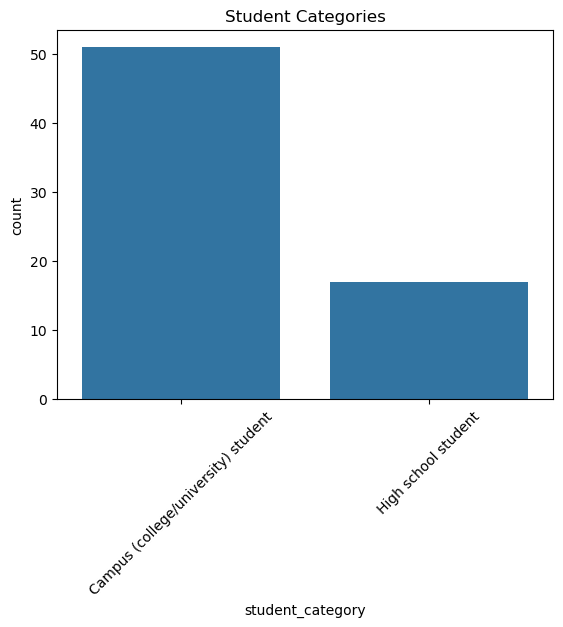

In [147]:
sns.countplot(data=df, x='student_category')
plt.title('Student Categories')
plt.xticks(rotation=45)
plt.show()

# Bar chart showing student 

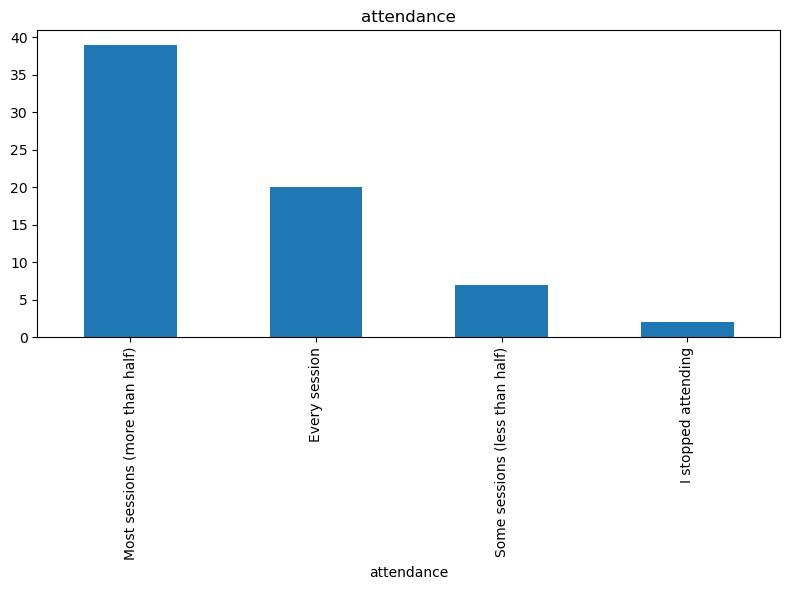

In [149]:
plt.figure(figsize=(8,6))
df['attendance'].value_counts().plot(kind='bar')
plt.title('attendance')
plt.tight_layout()
plt.show()

# Check the relationship between the two variables

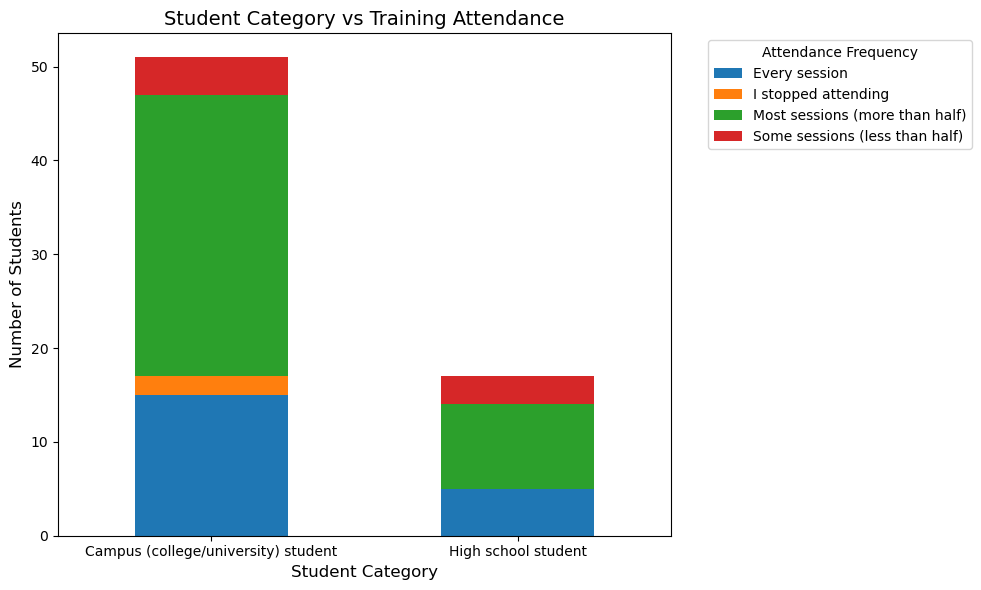

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab
ct = pd.crosstab(df['student_category'], 
                 df['attendance'])

# Custom colors (optional)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Plot
ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Title and labels
plt.title('Student Category vs Training Attendance', fontsize=14)
plt.xlabel('Student Category', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Rotate x-ticks
plt.xticks(rotation=0)

# Add legend outside the plot
plt.legend(title='Attendance Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()



# Reasons for missing sessions


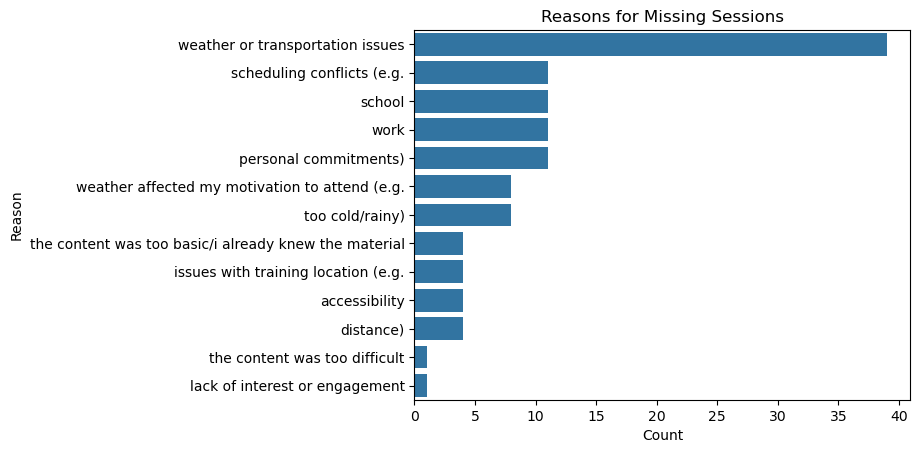

In [153]:
from collections import Counter

reasons = df['missing_reasons'].dropna()
all_reasons = ", ".join(reasons).split(",")
reason_counts = Counter([reason.strip().lower() for reason in all_reasons])

# Convert to DataFrame for plotting
reasons_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count']).sort_values('Count', ascending=False)

sns.barplot(data=reasons_df, y='Reason', x='Count')
plt.title('Reasons for Missing Sessions')
plt.show()

# Learning comfortability

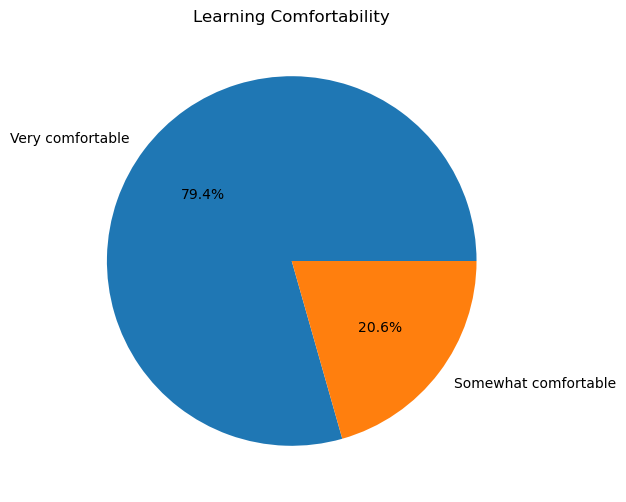

In [155]:


# Step 1: Get the value counts of the column
comfort_counts = df['comfortability'].value_counts()

# Step 2: Plot the pie chart from the Series
comfort_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='Learning Comfortability')
plt.ylabel('')  # Optional: remove y-axis label
plt.show()


# content relevance

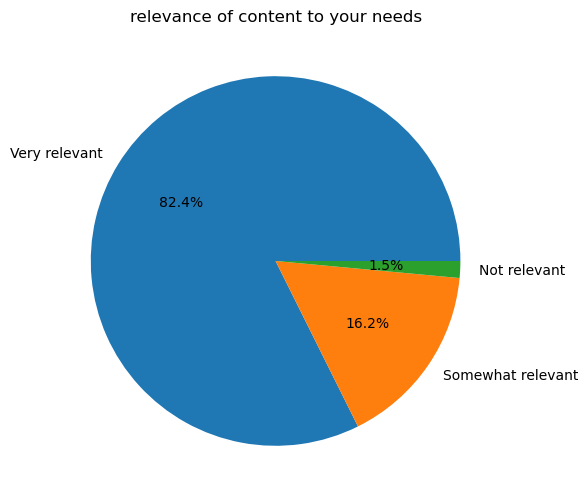

In [161]:
# Step 1: Get the value counts of the column
comfort_counts = df['relevance'].value_counts()

# Step 2: Plot the pie chart from the Series
comfort_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6), title='relevance of content to your needs') 
plt.ylabel('')  # Optional: remove y-axis label
plt.show()

# Recommendation to others

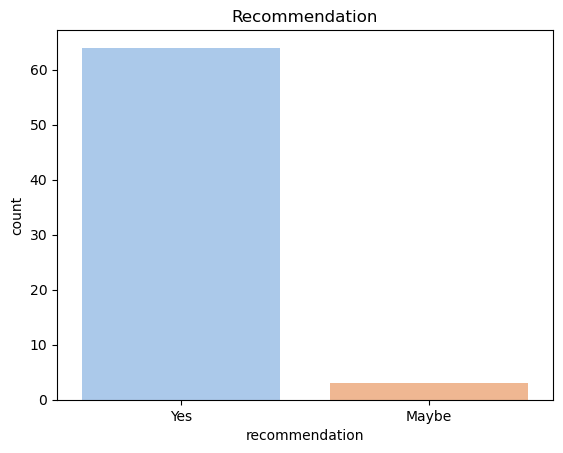

In [163]:
sns.countplot(data=df, x='recommendation',palette="pastel")
plt.title('Recommendation')
plt.show()

# keyword frequency bar chart

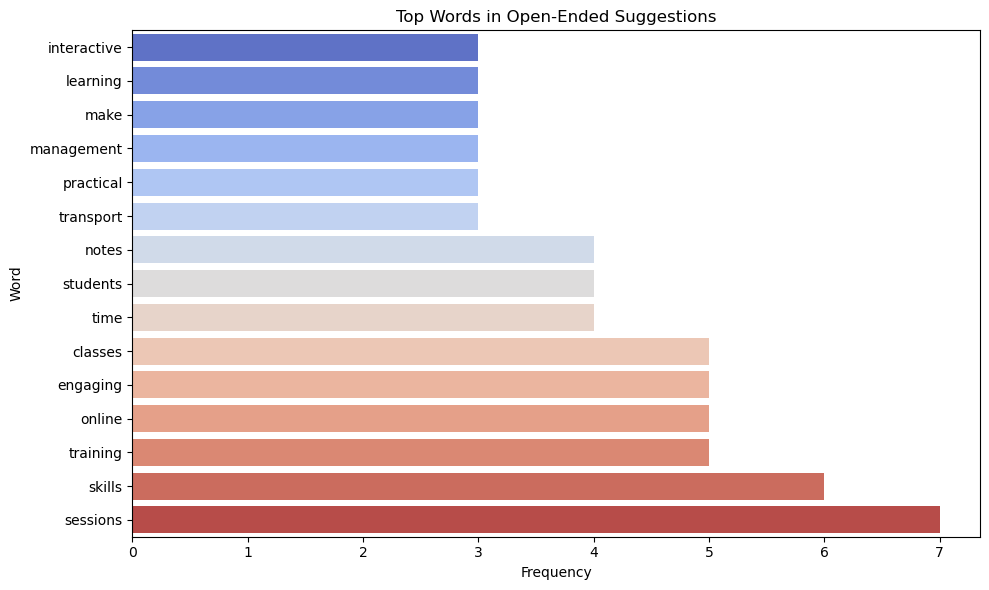

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing responses
text_data = df['training_improvement'].dropna()

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(text_data)

# Create DataFrame of word frequencies
word_freq = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Count': X.toarray().sum(axis=0)
}).sort_values(by='Count', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=word_freq, x='Count', y='Word', palette='coolwarm')
plt.title('Top Words in Open-Ended Suggestions')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()